In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


: 

In [2]:
# Load data
df = pd.read_csv('../data/BrentOilPrices.csv')


In [3]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Sort data just in case
df = df.sort_values('Date')


C:\Users\Win 10 Pro\AppData\Local\Temp\ipykernel_21560\3427564426.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


In [4]:
# Preview data
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [ ]:
# Drop rows where 'Date' is NaT (invalid/missing dates)
df = df.dropna(subset=['Date'])

#  reset the index
df = df.reset_index(drop=True)


In [7]:
print(df.isnull().sum())  # counts missing in each column
print(df.describe())      # summary stats to spot outliers


Date     0
Price    0
dtype: int64
                                Date        Price
count                           9011  9011.000000
mean   2005-02-10 23:46:53.760958720    48.420782
min              1987-05-20 00:00:00     9.100000
25%              1996-03-20 12:00:00    19.050000
50%              2005-02-02 00:00:00    38.570000
75%              2014-01-09 12:00:00    70.090000
max              2022-11-14 00:00:00   143.950000
std                              NaN    32.860110


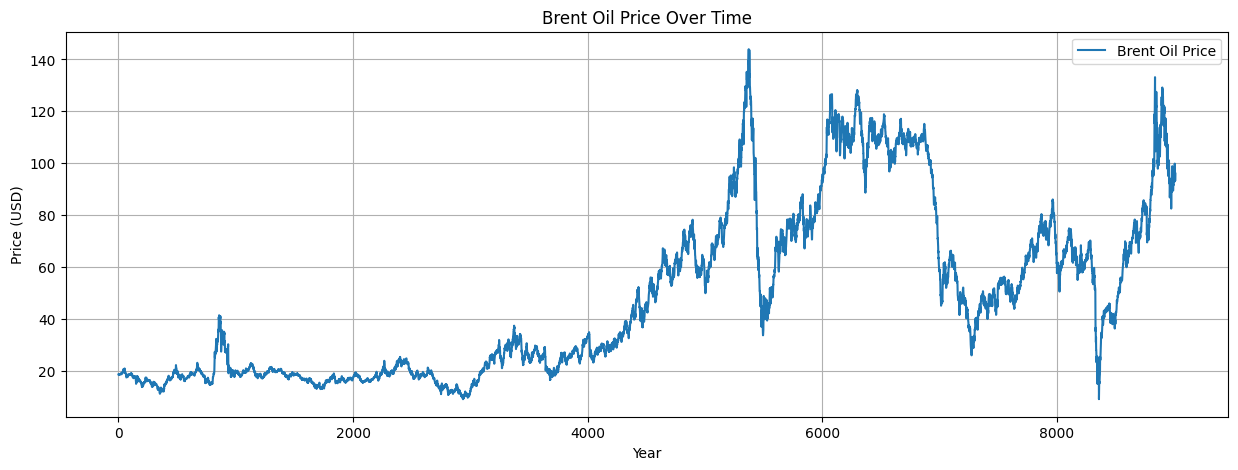

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Price'], label='Brent Oil Price')
plt.title('Brent Oil Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid()
plt.legend()
plt.show()


In [ ]:
#Load events file
events = pd.read_csv('../data/key_events.csv')
events['Date'] = pd.to_datetime(events['Start Date'], errors='coerce')


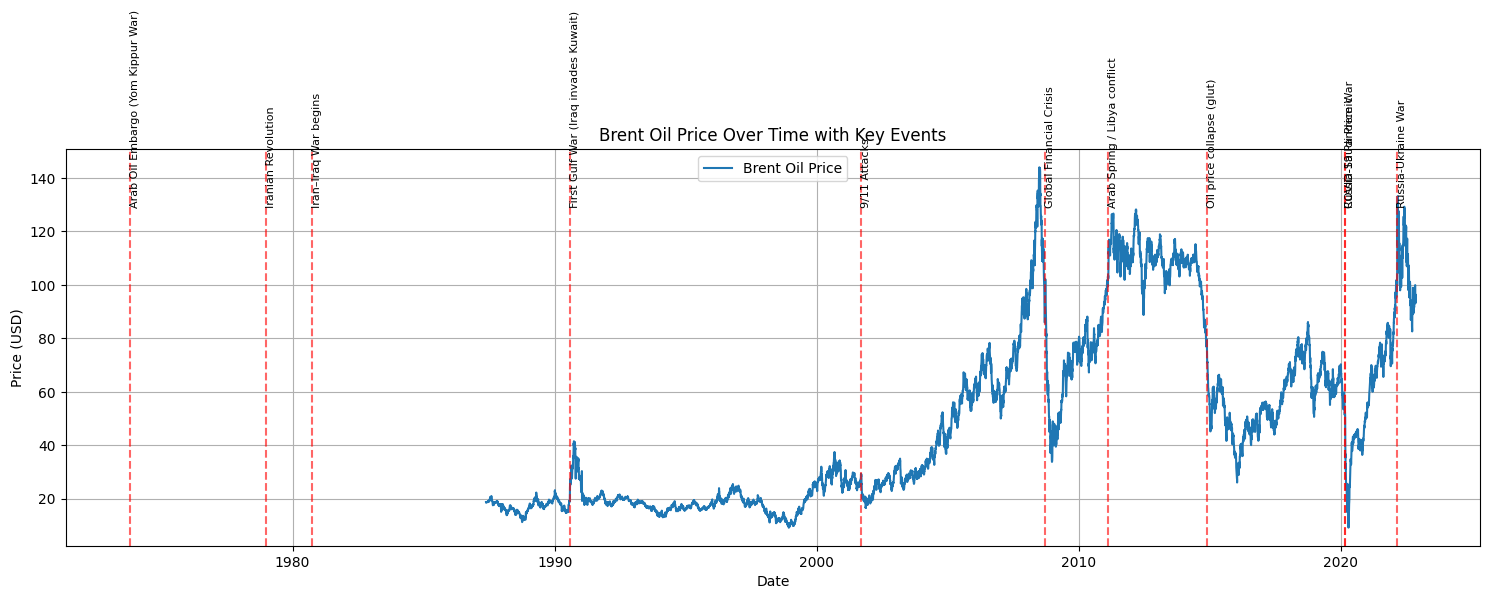

In [ ]:

# Plot with dates on the x-axis
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')

for _, row in events.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.6)
    plt.text(row['Date'], df['Price'].max()*0.9, row['Event Name'], rotation=90, fontsize=8)

plt.title('Brent Oil Price Over Time with Key Events')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


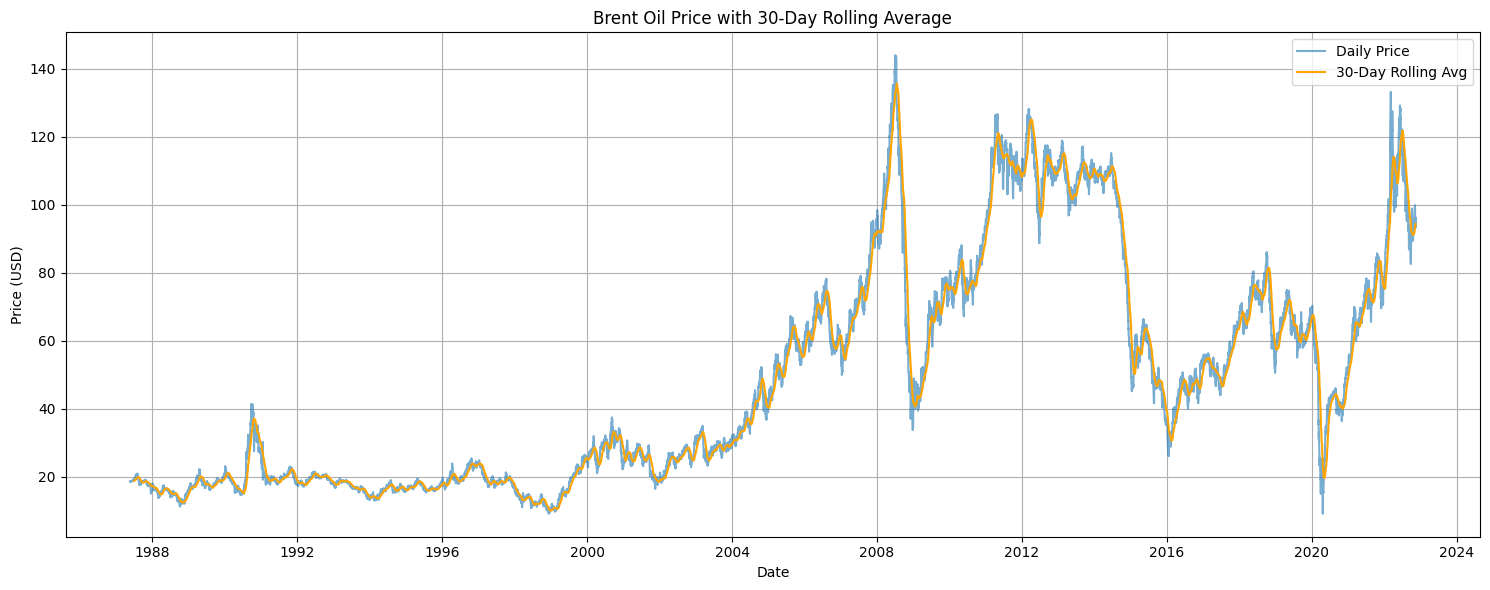

In [11]:
#Descriptive Statistics & EDA Summary

# Add 30-day rolling average column
df['RollingAvg'] = df['Price'].rolling(window=30).mean()

plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Price'], label='Daily Price', alpha=0.6)
plt.plot(df['Date'], df['RollingAvg'], label='30-Day Rolling Avg', color='orange')
plt.title('Brent Oil Price with 30-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
df.to_csv('../data/cleaned_oil_prices.csv', index=False)
print("Cleaned data saved.")


Cleaned data saved.
